### Linear Regression

y^ = θ_0 + θ_1.x1 + ....+ θ_n.xn

y^ - predicted value<br>
n - number of features <br>
x(i) - ith feature value<br>
θ_j - jth model parameter 

**Linear Regression in Vectorized Form** <br>
y^ = h_θ(x) = θ . x

- θ is the model’s parameter vector, containing the bias term θ0 and
the feature weights θ1 to θn <br>
- x is the instance’s feature vector, containing x0 to xn, with x0 always
equal to 1 <br>
- θ · x is the dot product of the vectors θ and x, which is of course equal to θ_0 + θ_1.x1 + ....+ θ_n.xn <br>
- hθ is the hypothesis function, using the model parameters θ

**How do we train Linear Regression Model ??** <br>
- Training a model means setting its parameters so that the model best fits the training set. <br>
- For this purpose, we first need a measure of how well(or poorly) the model fits the training data
- Most common performance measure of a regression model is the Root Mean Square Error (RMSE)
- Therefore, to train a Linear Regression model, we need to find the value of θ that minimizes the RMSE

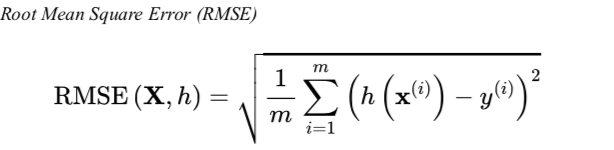


In pratice it is simpler to minimize the mean squared error (MSE) than the RMSE <br>
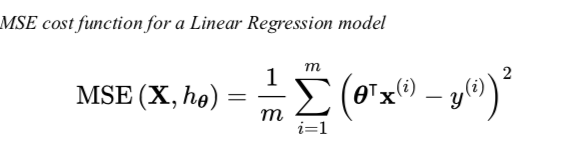

**The Normal Equation**<br>
To find the value of θ that minimizes the cost function, there is a **closed-form solution**—in other words, a mathematical equation that gives the result directly. This is called the Normal Equation <br>

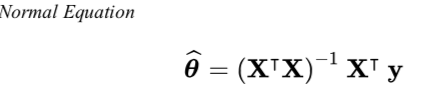

θ^ : is the value of θ that minimizes the cost function. <br>
y :  is the vector of target values containing y(1) to y(m).

In [ ]:
## generating some linear-looking data to test this equation 
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


In [ ]:
X = 2* np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)

In [ ]:
X[:10]

array([[0.53968682],
       [0.68710825],
       [1.10275385],
       [1.28478619],
       [1.27685378],
       [1.00781432],
       [0.45820073],
       [0.86521074],
       [0.09106889],
       [0.69241623]])

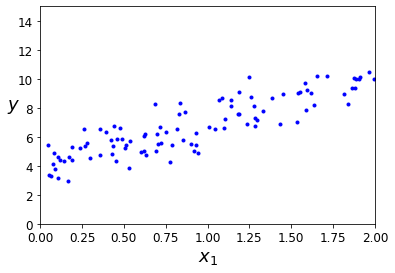

In [ ]:
plt.plot(X,y,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

**Computing θ^ using normal equation**

In [ ]:
## Computing θ^ using normal equation

X_b = np.c_[np.ones((100,1)),X] ## add X0 =1 to each instance ,100 as we took 100 data points in 1st equation
X_b[:10]

array([[1.        , 0.53968682],
       [1.        , 0.68710825],
       [1.        , 1.10275385],
       [1.        , 1.28478619],
       [1.        , 1.27685378],
       [1.        , 1.00781432],
       [1.        , 0.45820073],
       [1.        , 0.86521074],
       [1.        , 0.09106889],
       [1.        , 0.69241623]])

In [ ]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.99678239],
       [3.02009094]])

Our original equation used was, y = 4 + 3x + Gaussian Noise <br>
but our model gave theta_0 = 4.13 and theta_1 = 2.89 , the noise made it impossible to recover the exact parameters of the original function.

**Now, we can make predictions using theta^**

y^ = h_θ(x) = theta_best . x

In [ ]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new] # add X_0 =1 to each instance
X_new_b

array([[1., 0.],
       [1., 2.]])

In [ ]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.99678239],
       [10.03696428]])

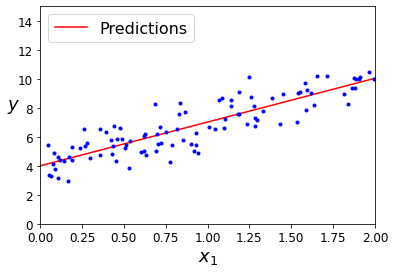

In [ ]:
## plotting the model prediciton 
plt.plot(X_new,y_predict,'r-',label='Predictions')
plt.plot(X,y,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc='upper left',fontsize=16)
plt.axis([0, 2, 0, 15])
plt.show()

**Performing Linear Regression using Scikit-Learn**

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([3.99678239]), array([[3.02009094]]))

In [ ]:
lin_reg.predict(X_new)

array([[ 3.99678239],
       [10.03696428]])

Making predictions on twice as many instances (or twice as many features) will take roughly twice as much time.

<font color='green'>Different way to train a Linear Regression model
- Gradient Descent

**Gradient Descent**<br>
Idea: tweak parameters iteratively in order to minimize a cost function.

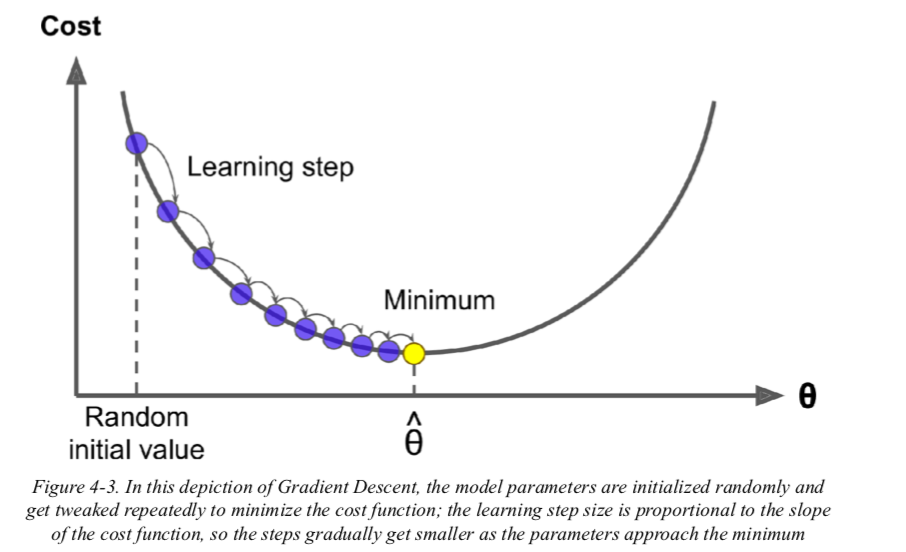


**Batch Gradient Descent**

To implement Gradient Descent, we need to compute the gradient of the cost function with regard to each model parameter θj.

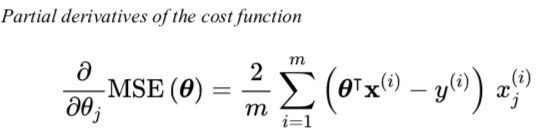

Instead of computing these partial derivatives individually, we can compute them in one go.

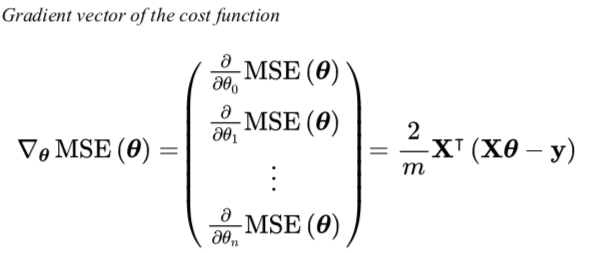

Gradient Descent step <br>

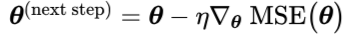

In [ ]:
eta = 0.1 # learning rate
n_iterations = 1000
m =100 # m =100 as we took 100 data points 
theta = np.random.randn(2,1) # random initialization
theta

array([[2.23776845],
       [0.38314639]])

In [ ]:
for iteration in range(n_iterations):
  gradients = (2/m)*X_b.T.dot(X_b.dot(theta)-y)
  theta = theta - ( eta*gradients )

theta

array([[3.99678239],
       [3.02009094]])

In [ ]:
##  lets try to use the X_new_b to predict 
X_new_b.dot(theta)

array([[ 3.99678239],
       [10.03696428]])

This is exactly what the Normal Equation found . Gradient Descent worked perfectly.

**What if we had used a different learning rate ?**

In [ ]:
theta_path_bgd =[]

def plot_gradient_descent(theta,eta,theta_path=None):
  m = len(X_b)
  plt.plot(X,y,'b.')
  n_iterations =1000
  for iteration in range(n_iterations):
    if iteration <10:
      y_predict = X_new_b.dot(theta)
      style ="b-" if iteration >0 else "r--"
      plt.plot(X_new, y_predict, style)
    gradients = (2/m)*X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients
    if theta_path is not None:
      theta_path.append(theta)
  plt.xlabel("$X_1$", fontsize=18)
  plt.axis([0,2,0,15])
  plt.title(r"$\eta = {}$".format(eta), fontsize=16)

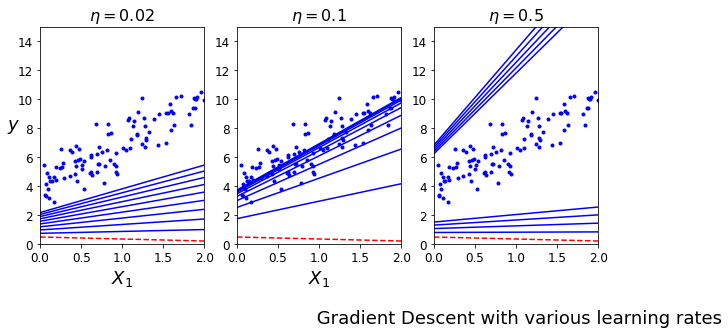

In [ ]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)

plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.xlabel("\n\n Gradient Descent with various learning rates")
plt.show()

**On left** : learning rate is too low: the algorithm will eventually reach the solution, but it will take a long time <br>
**In Middle**: learning rate looks pretty good: in just a few iterations, it has already converged to the solution <br>
**On right**: learning rate is too high: the algorithm diverges, jumping all over the place and actually getting further and further away from the solution at every step<br>

**To find a good learning rate, we can use grid search** <br>
how to set the number of iterations ?? <br>
- If too low , will be still far away from the optimal solution when the algorithm stops;
- If too high, will waste time while the model parameters do not change anymore.
- A simple solution is to set a very large number of iterations but to interrupt the algorithm when the gradient vector becomes tiny i.e. , when its norm becomes smaller than a tiny number ε (called the tolerance)— because this happens when Gradient Descent has (almost) reached the minimum.

In [ ]:
theta_path_bgd[:10]

[array([[1.76474146],
        [1.20239421]]), array([[2.53805288],
        [2.01311893]]), array([[3.01089743],
        [2.50221092]]), array([[3.30121243],
        [2.79613194]]), array([[3.48060428],
        [2.97165702]]), array([[3.59255049],
        [3.07539516]]), array([[3.6634507 ],
        [3.13564091]]), array([[3.70933598],
        [3.16956965]]), array([[3.7399423 ],
        [3.18760619]]), array([[3.76118358],
        [3.19607692]])]

**Stochastic Gradient Descent**

Problem with Batch Gradient Descent <br>
it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large. <br>

But, <font color='green'>Stochastic Gradient Descent picks a random instance in the training set at every step and computes the gradients based only on that single instance.</font> <br>
- It also makes it possible to train on huge training sets, since only one instance needs to be in memory at each iteration
- due to its stochastic (i.e., random) nature, this algorithm is much less regular than Batch Gradient Descent: instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on average.<br>
Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around, never settling down  So once the algorithm stops, the final parameter values are good, but not optimal.
- When the cost function is very irregular, this can actually help the algorithm jump out of local minima, so Stochastic Gradient Descent has a better chance of finding the global minimum than Batch Gradient Descent does.
- Therefore, randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minimum. 
- One solution to this  is to gradually reduce the learning rate. The steps start out large (which helps make quick progress and escape local minima), then get smaller and smaller, allowing the algorithm to settle at the global minimum. This process is similar to simulated annealing


**epoch specifies the number of times the network sees the whole training data**




In [ ]:
m # number of data points 

100

epoch:0,i:0,xi:[[1.         0.45477645]],yi:[[4.35360755]],gradients:[[-6.02656181]
 [-2.74073836]],eta:0.1,theta:[[1.25034472]
 [1.79710369]] are:
epoch:0,i:10,xi:[[1.         0.68710825]],yi:[[8.29322944]],gradients:[[-3.89236479]
 [-2.67447598]],eta:0.08333333333333333,theta:[[4.36719961]
 [3.57636374]] are:
epoch:0,i:20,xi:[[1.        0.8199724]],yi:[[6.51343234]],gradients:[[0.14683366]
 [0.12039955]],eta:0.07142857142857142,theta:[[3.97839189]
 [3.15976175]] are:
epoch:0,i:30,xi:[[1.         1.58279503]],yi:[[9.6955833]],gradients:[[-3.81187219]
 [-6.03341237]],eta:0.0625,theta:[[3.65328973]
 [3.14093286]] are:
epoch:0,i:40,xi:[[1.         0.45820073]],yi:[[5.83268764]],gradients:[[-0.37969469]
 [-0.17397638]],eta:0.05555555555555555,theta:[[4.20685489]
 [3.18966808]] are:
epoch:0,i:50,xi:[[1.         0.26948674]],yi:[[5.34925123]],gradients:[[-1.65369142]
 [-0.44564792]],eta:0.05,theta:[[3.90148261]
 [2.63319925]] are:
epoch:0,i:60,xi:[[1.         1.88194959]],yi:[[9.37412985]],

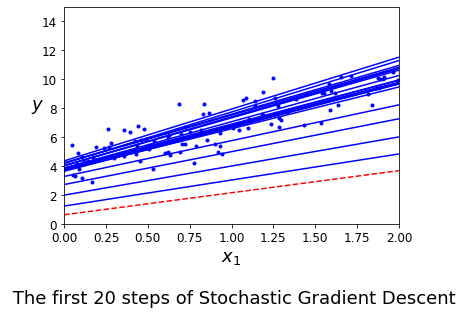

In [ ]:
n_epochs =50
t0,t1 =5,50 # learning schedule parameter
theta_path_sgd = []

def learning_schedule(t): ## this is to compute learning rate eta 
  return t0 /(t+t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                     
            y_predict = X_new_b.dot(theta)            
            style = "b-" if i > 0 else "r--"          
            plt.plot(X_new, y_predict, style)         
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        if epoch %5==0 and i%10==0:
          print("epoch:{},i:{},xi:{},yi:{},gradients:{},eta:{},theta:{} are:".format(epoch,i,xi,yi,gradients,eta,theta))
        theta_path_sgd.append(theta)                  

plt.plot(X, y, "b.")                                  
plt.xlabel("$x_1$ \n\n The first 20 steps of Stochastic Gradient Descent", fontsize=18)                      
plt.ylabel("$y$", rotation=0, fontsize=18)    
plt.axis([0, 2, 0, 15])                               
plt.show()                  

In [ ]:
theta

array([[3.99850023],
       [3.01486653]])

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=50,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_


(array([4.00258784]), array([3.04640051]))

**Caution**
- When using Stochastic Gradient Descent, the training instances must be independent and identically distributed (IID) to ensure that the parameters get pulled toward the global optimum, on average. 
- A simple way to ensure this is to shuffle the instances during training 
(e.g., pick each instance randomly, or shuffle the training set at the beginning of each epoch). 
- If you do not shuffle the instances—for example, if the instances are sorted by label—then SGD will start by optimizing for one label, then the next, and so on, and it will not settle close to the global minimum.


### Mini-Batch Gradient Descent

- Mini-batch GD computes the gradients on small random sets of instances called mini-batches. 
- The main advantage of Mini- batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.
- The algorithm’s progress in parameter space is less erratic than with Stochastic GD, especially with fairly large mini-batches. 
- As a result, Mini- batch GD will end up walking around a bit closer to the minimum than Stochastic GD—but it may be harder for it to escape from local minima


In [ ]:
theta_path_mgd=[]
n_epochs=50 # here it refers to epochs
mini_batch_size=20


theta = np.random.randn(2,1) # random initialization

t0,t1=200,1000

def learning_schedule(t):
  return t0/(t+t1)

t=0
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0,m,mini_batch_size): # i will be 0,20,40,60,80 as mini_batch_size is 20 
        t += 1
        xi = X_b_shuffled[i:i+mini_batch_size]
        yi = y_shuffled[i:i+mini_batch_size]
        gradients = 2/mini_batch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        #print(eta,gradients,"-",theta)
        theta = theta - (eta * gradients)
        theta_path_mgd.append(theta)

In [ ]:
theta

array([[3.92012091],
       [2.95721433]])

In [ ]:
theta_path_mgd[-1] ## this is the final theta value as above 

array([[3.92012091],
       [2.95721433]])

In [ ]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

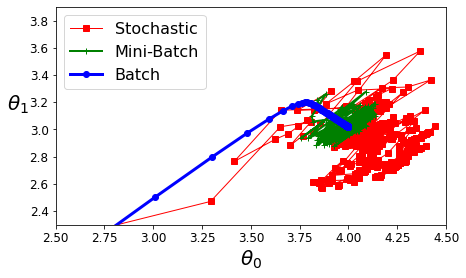

In [ ]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:,0], theta_path_sgd[:,1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:,0], theta_path_mgd[:,1], "g-+", linewidth=2, label="Mini-Batch")
plt.plot(theta_path_bgd[:,0], theta_path_bgd[:,1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

Above figure shows the paths taken by the three Gradient Descent algorithms in parameter space during training. 
- They all end up near the minimum, but Batch GD’s path actually stops at the minimum, while both Stochastic GD and Mini-batch GD continue to walk around. 
- Batch GD takes a lot of time to take each step, and Stochastic GD and Mini-batch GD would also reach the minimum if you used a good learning schedule

### Polynomial Regression

What if data is more complex than a straight line? <br>
- We can use linear model to fit non-linear data.
- It can be done by adding powers of each feature as new features,then train a linear model on this extended set of features. This is called <font color='green'> Polynomial Regression </font>

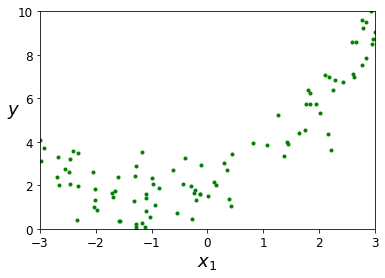

In [ ]:
## generating non-linear data
m =100 ## no. of training data
X= 6* np.random.rand(m,1)- 3
y= 0.5*X**2 + X + 2 + np.random.randn(m,1)

plt.plot(X,y,'g.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()


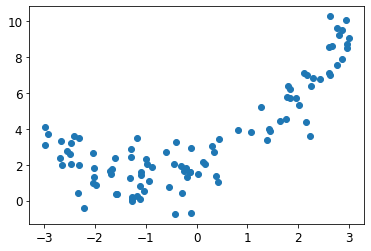

In [ ]:
## data can be plotted as below also

plt.scatter(X[:, 0].reshape(-1,1), y)

In [ ]:
## Straight line can't fit the data here, using sklearn Polynomial Feature
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print( X[0])
print(X_poly[0])

[-2.46208661]
[-2.46208661  6.06187049]


X_poly contains original feature of X and its square i.e 0.05841306**2 = 0.00341209

In [ ]:
## now we can fit Linear regression to this extended training data 
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_ , lin_reg.coef_

(array([1.7594576]), array([[1.01802176, 0.50874904]]))

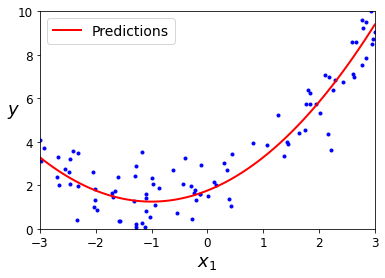

In [ ]:
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

In [ ]:
print(len(y_new))
y_new[:10]

100


array([[3.28413369],
       [3.16270101],
       [3.04500569],
       [2.93104775],
       [2.82082717],
       [2.71434396],
       [2.61159811],
       [2.51258963],
       [2.41731852],
       [2.32578477]])

In [ ]:
X[0:10]


array([[-2.46208661],
       [-0.97584553],
       [-2.46179449],
       [ 2.76926234],
       [ 1.8435699 ],
       [-0.24220347],
       [-1.65838471],
       [ 2.60073063],
       [-0.93242043],
       [-2.03409341]])

In [ ]:
X_poly[0:10] ## here we can see that the 2nd column is square of 1st which is equivalent to X

array([[-2.46208661,  6.06187049],
       [-0.97584553,  0.9522745 ],
       [-2.46179449,  6.06043209],
       [ 2.76926234,  7.66881389],
       [ 1.8435699 ,  3.39874996],
       [-0.24220347,  0.05866252],
       [-1.65838471,  2.75023985],
       [ 2.60073063,  6.76379982],
       [-0.93242043,  0.86940785],
       [-2.03409341,  4.137536  ]])

## Polynomial Regression without Sklearn
- It can be done by adding powers of each feature as new features,then train a linear model on this extended set of features.

- lets use degree 2 in below

In [ ]:
## using Same training data X as we can compare the results of with and without sklearn

X_concat = np.concatenate((X,X**2),axis=1) ## it makes same as X_poly
X_a = np.c_[np.ones((m,1)),X_concat] # here m=100 as defined above
X_a[:10]

array([[ 1.        , -2.46208661,  6.06187049],
       [ 1.        , -0.97584553,  0.9522745 ],
       [ 1.        , -2.46179449,  6.06043209],
       [ 1.        ,  2.76926234,  7.66881389],
       [ 1.        ,  1.8435699 ,  3.39874996],
       [ 1.        , -0.24220347,  0.05866252],
       [ 1.        , -1.65838471,  2.75023985],
       [ 1.        ,  2.60073063,  6.76379982],
       [ 1.        , -0.93242043,  0.86940785],
       [ 1.        , -2.03409341,  4.137536  ]])

In [ ]:
theta_best = np.linalg.inv(X_a.T.dot(X_a)).dot(X_a.T).dot(y)
theta_best

array([[1.7594576 ],
       [1.01802176],
       [0.50874904]])

<font color='blue'>**As you can see this theta_best gives same result as using sklearn** </font> i.e. [1.92817699 as intercept , array([[1.0249721, 0.4833771]])) are coefficient .

Let's do prediction and prepare the data as done for sklearn



In [ ]:
X_new = np.linspace(-3,3,100).reshape(100,1)
X_concat = np.concatenate((X_new, X_new**2),axis=1) 
X_new_a = np.c_[np.ones((m,1)),X_concat] # here m=100 as defined above

In [ ]:
y_predict = X_new_a.dot(theta_best)
y_predict[:10]

array([[3.28413369],
       [3.16270101],
       [3.04500569],
       [2.93104775],
       [2.82082717],
       [2.71434396],
       [2.61159811],
       [2.51258963],
       [2.41731852],
       [2.32578477]])

In [ ]:
## we can see here that y_predict is nearly as same as y_new of sklearn
print(np.sum(y_predict-y_new))
print(y_predict.shape,"--",y_new.shape)

2.2160051571518125e-13
(100, 1) -- (100, 1)


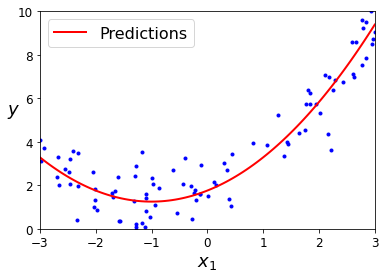

In [ ]:
## plotting the model prediciton 
plt.plot(X,y,'b.')
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions") 
## X_new is taken as we are predicting on X_new by transforming it to (100,3)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc='upper left',fontsize=16)
plt.axis([-3, 3, 0, 10])
plt.show()

**Observation** <br>

The model estimates y^= 0.48* $x1^2$ + 1.02*x1 + 1.92 where our original function was y = 0.5* $x1^2$ + 1.0*x1 + 2.

- When there are multiple features, Polynomial Regression is capable of finding relationships between features (which is something a plain Linear Regression model cannot do).
- It is due to the fact that PolynomialFeatures also adds all combinations of features up to the given degree. 
- For example, if there were two features a and b PolynomialFeatures with degree 3 would not only add the features $a^2$ ,$a^3$ ,$b^2$, $b^3$ but also the combinations of ab,$a^2$b and a$b^2$
        
### Learning Curves

- Performing high degree polynomial function would will likely fit the training data much better than with plain Linear Regression for e.g. taking 300 degree polynomial severely overfit the training data, while the linear model will underfit it.
- The model that will generalize best in this case is the quadratic model, which makes sense because the data was generated using a quadratic model.


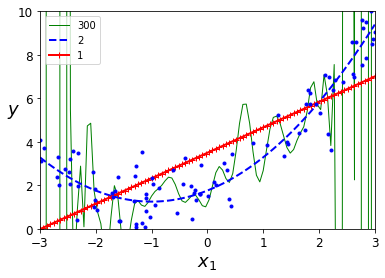

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style,width,degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
  polybig_features = PolynomialFeatures(degree=degree,include_bias=False)
  std_scaler = StandardScaler()
  lin_reg = LinearRegression()
  polynomial_regression = Pipeline([
                                    ("poly_features",polybig_features),
                                    ("std_scaler",std_scaler),
                                    ("lin_reg",lin_reg),
                                  ])
  polynomial_regression.fit(X,y)
  y_newbig = polynomial_regression.predict(X_new)
  plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

- In general we won’t know what function generated the data, so <br>
 **How can we decide how complex our model should be? <br>
How can we tell that our model is overfitting or underfitting the data?** <br>

- If a model performs well on the training data but generalizes poorly according to the cross-validation metrics, then your model is overfitting. i.e. complex model
- If it performs poorly on both, then it is underfitting. i.e. simple model
- Another way is to look at the **learning curves**: these are plots of the model’s performance on the training set and the validation set as a function of the training set size (or the training iteration)
- To generate the plots, train the model several times on different sized subsets of the training set

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
    X_train ,X_val, y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=1)
    train_errors,val_errors =[],[]
    for m in range(1,len(X_train)):
      model.fit(X_train[:m],y_train[:m])
      y_train_predict = model.predict(X_train[:m])
      y_val_predict = model.predict(X_val)
      train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
      val_errors.append(mean_squared_error(y_val,y_val_predict))
  
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)    
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              


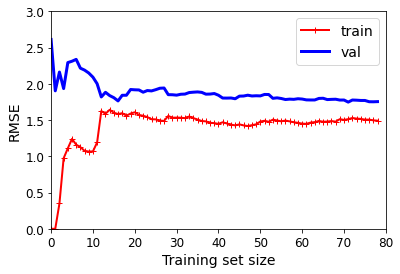

In [ ]:
lin_reg = LinearRegression()
m =100 ## no. of training data
X= 6* np.random.rand(m,1)- 3
y= 0.5*X**2 + X + 2 + np.random.randn(m,1)

plot_learning_curves(lin_reg,X,y)
plt.axis([0, 80, 0, 3])
plt.show()

In [ ]:
X.shape,y.shape

((100, 1), (100, 1))

**Observations**: <br>
  Performance on Training Instance
- When there are just one or two instances in the training set, the model can fit them perfectly, which is why the curve starts at zero.
- But as new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly, both because the data is noisy and because it is not linear at all.
- So the error on the training data goes up until it reaches a plateau, at which point adding new instances to the training set doesn’t make the average error much better or worse.

Performance on Validation Instance <br>
- When the model is trained on very few training instances, it is incapable of generalizing properly, which is why the validation error is initially quite big.
- As model is shown more training examples, it learns, and thus the validation error slowly goes down.
- However, once again a straight line cannot do a good job modeling the data, so the error ends up at a plateau, very close to the other curve.<br>
<font color ='blue'>
These learning curves are typical of a model that’s underfitting.</font> Both curves have reached a plateau; they are close and fairly high.

**Why it is Underfitting ?** <br>
As we see the error on the training set as well as validation set is still high after adding more training instances. It is unable to low down the error i.e. Model is too simple. Hence ,called ***HIGH BIAS***

**TIP**

If a model is underfitting the training data, adding more training examples will not help. We need to use a more complex model or come up with better features.


let’s look at the learning curves of a 10th-degree polynomial model on the same data

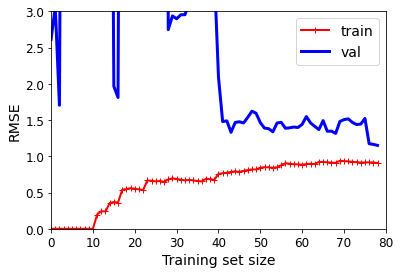

In [ ]:
## let’s look at the learning curves of a 10th-degree polynomial model on the same data
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
                                  ("poly_features",PolynomialFeatures(degree=10,include_bias=False)) ,
                                  ("lin_regs",LinearRegression())
                                ])

plot_learning_curves(polynomial_regression,X,y)
plt.axis([0, 80, 0, 3])
plt.show()

               Learning curves for the 10th-degree polynomial model

**Observations**
- As we can see the error on the training data with Polynomial regression is much lower than with the Linear Regression model.
- There is a gap between the curves. This means that the model performs significantly better on the training data than on the validation data, which is the hallmark of an **overfitting** model. 
- If we used a much larger training set, however, the two curves would continue to get closer. As it can be seen below that using training set of 1000 reduces the gap

**TIP**<br>
One way to improve an overfitting model is to feed it more training data until the validation error reaches the training error.


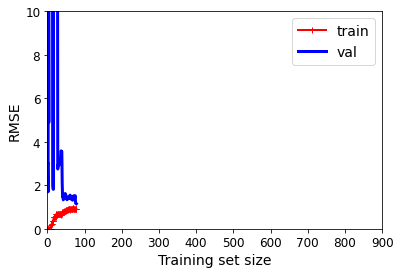

In [ ]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
                                  ("poly_features",PolynomialFeatures(degree=10,include_bias=False)) ,
                                  ("lin_regs",LinearRegression())
                                ])

plot_learning_curves(polynomial_regression,X,y)
plt.axis([0, 900, 0, 10])
plt.show()

  <font size =5> THE BIAS/VARIANCE TRADE-OFF </font> <br>

BIAS = Difference between True Model and Estimated Model <br>
VARIANCE = Difference between Different Training sets for e.g difference between training set and Validation set 

- Using Simple linear Regression in 1st curve it is **HIGH BIAS**  i.e. Underfit,as the Model is too simple and unable to learn anything <br>
- Using Polynomial Regression in 2nd cure it is **HIGH VARIANCE** i.e. Overfit as the Model is too complex and learn every minute details in the training set <br>


Increasing a model’s complexity will typically increase its variance and reduce its bias. Conversely, reducing a model’s complexity increases its bias and reduces its variance. This is why it is called a trade-off.<br>


**Regularized Linear Models**

- <font color ='brown'>One way to reduce overfitting is to regularize the model(i.e. Constraint it)</font>: the fewer degrees of freedom it has, the harder it will be for it to overfit the data
- A simple way to regularize a polynomial model is to reduce the number of polynomial degrees.
- For a linear model, regularization is typically achieved by constraining the weights of the model.


### Ridge Regression
Ridge Regression is a regularized version of Linear Regression :a regularization term equal to alpha*sum(i=1 to n) $theta(i)^2$ is added to the cost function. 
- This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible.
- **The regularization term should only be added to the cost function during training**. Once the model is trained, we want to use the unregularized performance measure to evaluate the model’s performance.
- The hyperparameter α controls how much you want to regularize the model. 
  - α = 0, then Ridge Regression is just Linear Regression. 
  - α is very large, then all weights end up very close to zero and the result is a flat line going through the data’s mean.

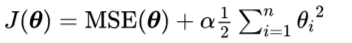




**Note**<br>
The bias term $θ_0$ is not regularized (the sum starts at i = 1, not 0). If we define w as the vector of feature weights (θ1 to θn), then the regularization term is equal to 1/2$($ ∥ w$∥_2)^2$, where $∥ w ∥^2$ represents the l2 norm of the weight vector.


**Why Penalize the Magnitude of Coefficients?**

Lets check the impact of model complexity on the magnitude of coefficients. for e.g, simulating a sine curve (between 60° and 300°) and adding some random noise using the below code:



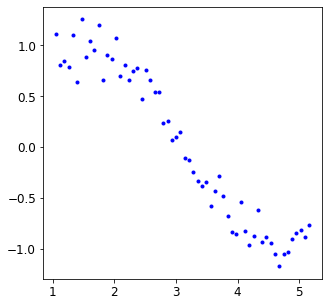

In [ ]:
import pandas as pd
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 5, 5

#Define input array with angles from 60deg to 300deg converted to radians
x = np.array([ i*np.pi/180 for i in range(60,300,4)])
np.random.seed(1)
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(data['x'],data['y'],'b.')


It resembles a sine curve but not exactly because of the noise.<br>
Let’s try to estimate the sine function using polynomial regression with powers of x from 1 to 15. Let’s add a column for each power upto 15 in our dataframe.  

Now that we have all the 15 powers, let’s make 15 different linear regression models with each model containing variables with powers of x from 1 to the particular model number

In [ ]:
for i in range(2,16):
  colname='x_%d'%i 
  data[colname] = data['x']**i

print(data.head())

          x         y       x_2  ...       x_13       x_14       x_15
0  1.047198  1.109677  1.096623  ...   1.821260   1.907219   1.997235
1  1.117011  0.807031  1.247713  ...   4.214494   4.707635   5.258479
2  1.186824  0.847958  1.408551  ...   9.268760  11.000386  13.055521
3  1.256637  0.790111  1.579137  ...  19.486248  24.487142  30.771450
4  1.326450  1.100107  1.759470  ...  39.353420  52.200353  69.241170

[5 rows x 16 columns]


In [ ]:
def linear_regression(data,power,models_to_plot):
  #initialize predictors 
  predictors=['x']
  if power >=2:
    predictors.extend(['x_%d'%i for i in range(2,power+1)])

  # fit model
  linreg = LinearRegression(normalize=True)
  linreg.fit(data[predictors],data['y'])
  y_pred = linreg.predict(data[predictors])

  #Check if a plot is to be made for the entered power
  if power in models_to_plot:
    plt.figure(figsize=(10,5))
    plt.subplot(models_to_plot[power])
    plt.axis([1, 5.5, -1.5, 1.5])
    plt.tight_layout()
    plt.plot(data['x'],y_pred)
    plt.plot(data['x'],data['y'],'.')
    plt.title('Plot for power: %d'%power)

  #Return the result in pre-defined format
  rss = sum((y_pred-data['y'])**2)
  ret = [rss]
  ret.extend([linreg.intercept_])
  ret.extend(linreg.coef_)
  return ret


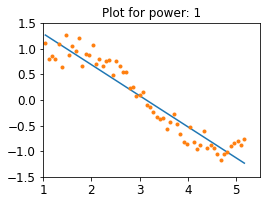

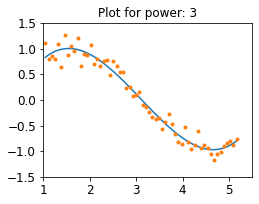

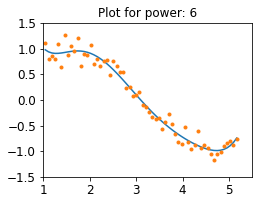

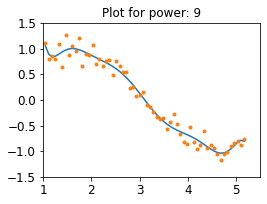

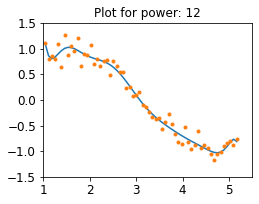

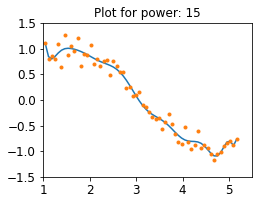

In [ ]:
#Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

#Iterate through all powers and assimilate results
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

As the model complexity increases, the models tends to fit even smaller deviations in the training data set. 


In [ ]:
coef_matrix_simple

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,3.12075,1.90058,-0.606723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,3.12074,1.90339,-0.608853,0.000342766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,1.1317,-0.961584,2.84864,-1.22378,0.131342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,1.1262,-0.577504,2.21495,-0.868545,0.0498269,0.00655967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,1.10627,1.29981,-1.70697,2.161,-1.04115,0.191464,-0.0119037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,1.05299,9.2201,-21.7152,21.9005,-10.823,2.77497,-0.358835,0.0186121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,1.05174,6.07584,-12.4022,10.7097,-3.73068,0.204537,0.176204,-0.0408663,0.00273504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,1.0512,11.4885,-30.7865,36.7617,-23.8856,9.53993,-2.48289,0.415457,-0.0405361,0.00174105,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,0.953965,199.679,-751.592,1213.56,-1100.09,618.228,-223.775,52.2548,-7.60451,0.62703,-0.0223636,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,0.939301,391.215,-1568.08,2722.5,-2693.52,1684.4,-696.877,193.511,-35.6803,4.18906,-0.283347,0.0084007,NaN,NaN,NaN,NaN,NaN


size of coefficients increase exponentially with increase in model complexity.<br>
see how coeff_x_1/x_7 increased as we go down.<br>
**Hence, we need to put constraint on the magnitude of coefficients to reduce model complexity.**

<font color ='green'>**What does a large coefficient signify?** </font>

It means that we’re putting a lot of emphasis on that feature, i.e. the particular feature is a good predictor for the outcome

**When too large**, the algorithm starts modelling intricate relations to estimate the output and **ends up overfitting** to the particular training data.

- Ridge regression performs 'L2 regularization'
- Objective = RSS or MSE + α * (sum of square of coefficients)
1. α = 0 
    - The objective becomes same as simple linear regression.
    - We’ll get the same coefficients as simple linear regression
2. α = ∞:
    - The coefficients will be zero. Why? Because of infinite weightage on square of coefficients, anything less than zero will make the objective infinite.
3. 0 < α < ∞:
    - The magnitude of α will decide the weightage given to different parts of objective.
    - The coefficients will be somewhere between 0 and ones for simple linear regression.





In [ ]:
## generic function for ridge regression 
from sklearn.linear_model import Ridge

def ridge_regression(data, predictors, alpha, models_to_plot={}):
  ## fit model
  ridge_reg = Ridge(alpha=alpha, normalize=True)
  ridge_reg.fit(data[predictors], data['y'])
  y_pred = ridge_reg.predict(data[predictors])

  # Check if a plot is to be made for the entered alpha
  
  if alpha in models_to_plot:
    plt.figure(figsize=(10,5))
    #fig, axes = plt.subplots(ncols=2, figsize=(15, 5))
    plt.subplot(models_to_plot[alpha])
    plt.axis([1, 5.5, -1.5, 1.5])
    plt.tight_layout()
    plt.plot(data['x'],y_pred)
    plt.plot(data['x'], data['y'], 'b.')
    plt.title('\n\t\t Plot for alpha: %.3g\n\t\t'%alpha)

  #Return the result in pre-defined format
  rss = sum((y_pred-data['y'])**2)
  ret = [rss]
  ret.extend([ridge_reg.intercept_])
  ret.extend(ridge_reg.coef_)
  return ret

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.81609e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


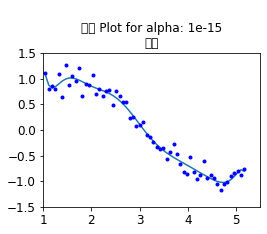

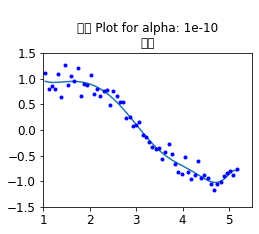

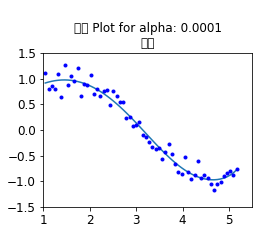

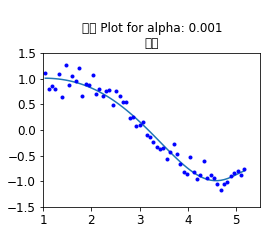

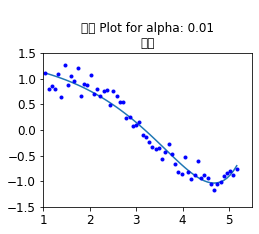

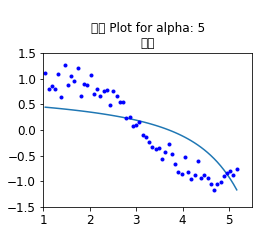

In [ ]:
## analyze the result of Ridge regression for 10 different values of α ranging from 1e-15 to 20
## analyze the trend with change in values of α. 

# Initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

**Observations** <br>
As the value of alpha increases, the model complexity reduces. Though higher values of alpha reduce overfitting, significantly high values can cause underfitting as well (eg. alpha = 5). Thus alpha should be chosen wisely. 

Scanning at the value of coefficients in the above models:(below)



In [ ]:
coef_matrix_ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,0.930799,278.187,-1023.94,1571.94,-1288.77,591.469,-134.733,2.92511,4.82012,-0.418119,-0.146781,0.00851281,0.00590589,3.0392e-05,-0.000347741,5.42035e-05,-2.60592e-06
alpha_1e-10,1.01943,5.67567,-13.4188,14.7122,-7.74921,1.81373,-0.0103366,-0.0601296,-0.00214646,0.00203013,0.000357491,-2.21068e-05,-1.85146e-05,-2.4843e-06,3.98781e-07,1.85277e-07,-2.34325e-08
alpha_1e-08,1.03484,2.71113,-3.66916,2.34689,-0.33415,-0.0934128,-0.00182046,0.00391444,0.000994222,6.84113e-05,-2.66101e-05,-1.00172e-05,-1.48121e-06,6.49325e-08,8.81555e-08,1.72268e-08,-3.60876e-09
alpha_0.0001,1.11958,0.29045,0.862183,-0.213471,-0.0374402,-0.00199452,0.000532969,0.000188522,3.48182e-05,4.06905e-06,9.68627e-08,-1.01801e-07,-3.40657e-08,-6.90772e-09,-8.62065e-10,2.83174e-11,6.16304e-11
alpha_0.001,1.24962,0.851963,0.279832,-0.101518,-0.0199729,-0.00207515,-2.46059e-05,4.6989e-05,1.38771e-05,2.75677e-06,4.35954e-07,5.42472e-08,4.1012e-09,-3.32334e-10,-2.33207e-10,-6.54327e-11,-1.39752e-11
alpha_0.01,1.52859,1.3049,-0.123491,-0.0499462,-0.00900862,-0.0011677,-9.63474e-05,2.94403e-06,3.54254e-06,1.01484e-06,2.17914e-07,3.97199e-08,6.23353e-09,7.86655e-10,5.22407e-11,-1.16695e-11,-6.76693e-12
alpha_1,5.43994,0.928952,-0.137267,-0.0189206,-0.00293741,-0.000453928,-6.79168e-05,-9.66208e-06,-1.26658e-06,-1.41198e-07,-9.46941e-09,1.23562e-09,7.67154e-10,2.39556e-10,6.21185e-11,1.47555e-11,3.33122e-12
alpha_5,13.371,0.514765,-0.0579012,-0.00835487,-0.00138819,-0.000235302,-3.98304e-05,-6.70365e-06,-1.12038e-06,-1.85735e-07,-3.04908e-08,-4.94387e-09,-7.88672e-10,-1.23046e-10,-1.85952e-11,-2.6764e-12,-3.54566e-13
alpha_10,17.3924,0.369712,-0.0365711,-0.00541316,-0.000928141,-0.000163273,-2.88473e-05,-5.09863e-06,-9.01045e-07,-1.59233e-07,-2.81427e-08,-4.97442e-09,-8.79279e-10,-1.55399e-10,-2.74549e-11,-4.8477e-12,-8.5522e-13
alpha_20,21.8771,0.248736,-0.0220424,-0.00333214,-0.000585457,-0.000105816,-1.92494e-05,-3.50929e-06,-6.40716e-07,-1.17157e-07,-2.14572e-08,-3.93642e-09,-7.2335e-10,-1.33136e-10,-2.45421e-11,-4.53074e-12,-8.37592e-13


**Observation** <br>
- The RSS increases with increase in alpha, Hence model complexity reduces
- An alpha as small as 1e-15 gives us significant reduction in magnitude of coefficients. How? Compare the coefficients in the first row of this table to the last row of simple linear regression table.
- High alpha values can lead to significant underfitting. Note the rapid increase in RSS for values of alpha greater than 1
- Though the coefficients are very very small, they are NOT zero.

The first 3 are very intuitive. But #4 is also a crucial observation. Let’s reconfirm the same by determining the number of zeros in each row of the coefficients data set:



In [ ]:
coef_matrix_ridge.apply(lambda x: sum(x.values==0),axis=1)


alpha_1e-15     0
alpha_1e-10     0
alpha_1e-08     0
alpha_0.0001    0
alpha_0.001     0
alpha_0.01      0
alpha_1         0
alpha_5         0
alpha_10        0
alpha_20        0
dtype: int64

This confirms that all the 15 coefficients are greater than zero in magnitude (can be +ve or -ve).


As with Linear Regression, we can perform Ridge Regression either by computing a **closed-form equation or by performing Gradient Descent**. The pros and cons are the same<br><br>

**Ridge Closed Form Solution**<br>
A is the (n + 1) × (n + 1) identity matrix

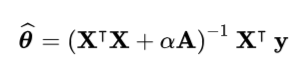

In [ ]:
new_data_b = np.c_[np.ones((data.shape[0],1)),data[predictors][['x']]] ## add X0 =1 to each instance ,100 as we took 100 data points in 1st equation
new_data_b.shape

(60, 2)

In [ ]:
#new_data=data[predictors][['x']]
A =new_data_b.T @ new_data_b
I = np.eye(A.shape[0])
c = new_data_b.T @ data['y']


In [ ]:
alpha_I = 1e-15 * I
B = A + alpha_I
w = np.linalg.solve(B,c)
w
## below gives intercpet and slope                    

array([ 1.90057925, -0.60672314])

#### Another Example of Ridge Regression

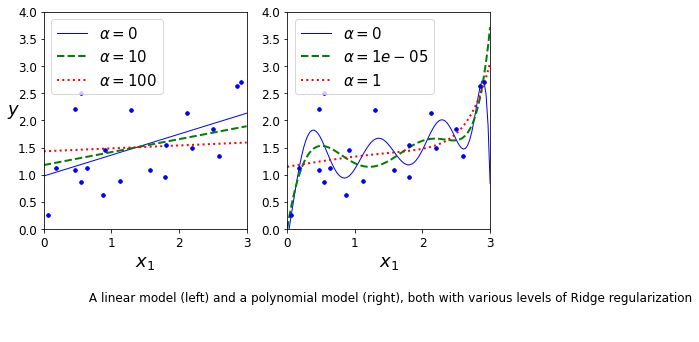

In [ ]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_args):
  for alpha,style in zip(alphas,("b-","g--","r:")):
    model = model_class(alpha,**model_args) if alpha >0 else LinearRegression()
    if polynomial:
      model =Pipeline([("poly_features",PolynomialFeatures(degree=10,include_bias=False)),
                       ("std_scaler",StandardScaler()),
                       ("regular_model",model)
                      ])
    model.fit(X,y)
    y_new_regular = model.predict(X_new)
    lw = 2 if alpha > 0 else 1
    plt.plot(X_new, y_new_regular, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.title("\n\n A linear model (left) and a polynomial model (right), both with various levels of Ridge regularization\n\n", y=-0.5)
plt.show()

On the left, plain Ridge models are used, leading to linear predictions. On the right, the data is first expanded using
PolynomialFeatures(degree=10), then it is scaled using a
StandardScaler(), and finally the Ridge models are applied to the resulting
features: **this is Polynomial Regression with Ridge regularization**. 

Note how increasing α leads to flatter (i.e., less extreme, more reasonable) predictions, thus reducing the model’s variance but increasing its bias.

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [ ]:
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty="l2", random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.49905184])

The **hyperparameter sets the type of regularization term to use**.<br> Specifying l2 indicates that you want SGD to add a regularization term to
the cost function equal to half the square of the l2 norm of the weight vector: this is simply Ridge Regression

In [ ]:
#ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

### LASSO Regression

Least Absolute Shrinkage and Selection Operator Regression (usually simply called Lasso Regression) is another regularized version of Linear Regression: just like Ridge Regression, it adds a regularization term to the cost function, but it uses the l1 norm of the weight vector instead of half the square of the l2 norm.

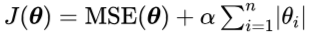

Objective = RSS or MSE + α * (sum of absolute value of coefficients)<br>

Here, α (alpha) works similar to that of ridge and provides a trade-off between balancing RSS and magnitude of coefficients. 
Like that of ridge, α can take various values. 

Lets iterate it here briefly:

α = 0: Same coefficients as simple linear regression<br>
α = ∞: All coefficients zero (same logic as before)<br>
0 < α < ∞: coefficients between 0 and that of simple linear regression






In [ ]:
from sklearn.linear_model import Lasso

def lasso_regression(data, predictors, alpha, models_to_plot={}):
  #Fit the Model
  lasso_reg = Lasso(alpha=alpha, normalize=True, max_iter=1e5)
  lasso_reg.fit(data[predictors],data['y'])
  y_pred = lasso_reg.predict(data[predictors])

  #Check if a plot is to be made for the entered alpha
  if alpha in models_to_plot:
    plt.figure(figsize=(10,5))
    plt.subplot(models_to_plot[alpha])
    plt.axis([1, 5.5, -1.5, 1.5])
    plt.tight_layout()
    plt.plot(data['x'],y_pred)
    plt.plot(data['x'],data['y'],'.')
    plt.title('Plot for alpha: %.3g'%alpha)
    
  #Return the result in pre-defined format
  rss = sum((y_pred-data['y'])**2)
  ret = [rss]
  ret.extend([lasso_reg.intercept_])
  ret.extend(lasso_reg.coef_)
  return ret

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5466246920840023, tolerance: 0.0035406266284589098
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5465852108241986, tolerance: 0.0035406266284589098
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5426676313070178, tolerance: 0.0035406266284589098
  positive)


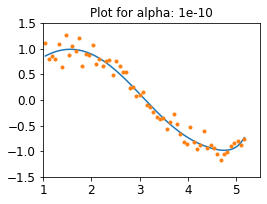

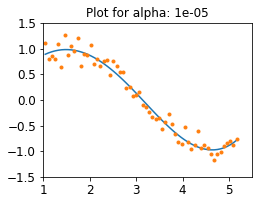

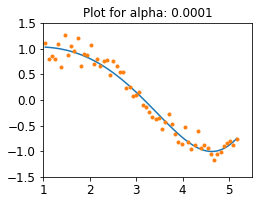

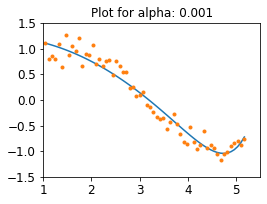

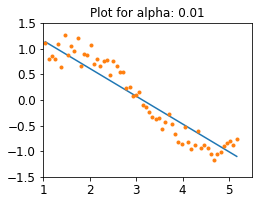

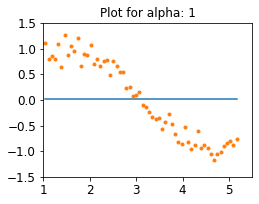

In [ ]:
#Initialize predictors to all 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot)

In [ ]:
coef_matrix_lasso

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,1.09325,-0.0847281,1.2178,-0.219642,-0.083927,0.000149168,0.00196343,0.000380494,3.62456e-05,-9.22058e-07,-1.18664e-06,-2.91963e-07,-4.73481e-08,-4.89238e-09,5.15163e-11,1.88109e-10,6.15677e-11
alpha_1e-10,1.09325,-0.0847195,1.21779,-0.219639,-0.0839258,0.000148726,0.00196345,0.000380491,3.62443e-05,-9.21172e-07,-1.18668e-06,-2.91967e-07,-4.73481e-08,-4.89217e-09,5.1406e-11,1.88091e-10,6.15726e-11
alpha_1e-08,1.09322,-0.0838175,1.21664,-0.219367,-0.0838092,0.000104239,0.00196584,0.000380237,3.61145e-05,-8.3245e-07,-1.19047e-06,-2.92384e-07,-4.73372e-08,-4.87199e-09,3.66463e-11,1.86959e-10,6.20375e-11
alpha_1e-05,1.12159,-0.0625058,1.40577,-0.471212,-0.00351483,-0,0.000676613,0.000213915,0,0,-0,-0,-3.12319e-08,-0,-0,0,1.41574e-11
alpha_0.0001,1.28036,0.927933,0.210395,-0.0785249,-0.0288019,-0,0,0,3.11767e-05,1.46374e-06,0,0,0,-0,-0,-0,-1.0137e-11
alpha_0.001,1.63307,1.24048,-0,-0.122377,-0,-0,-0,0,0,0,0,0,9.17008e-10,3.42571e-09,0,0,0
alpha_0.01,3.48075,1.70154,-0.542656,-0,-0,-0,-0,-0,-0,-0,0,0,0,0,0,0,0
alpha_1,35.4063,0.0156809,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_5,35.4063,0.0156809,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_10,35.4063,0.0156809,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0


**Observation**<br>
1. This also tells us that the model complexity decreases with increase in the values of alpha.
2. For the same values of alpha, the coefficients of lasso regression are much smaller as compared to that of ridge regression (compare row 1 of the 2 tables).
3. For the same alpha, lasso has higher RSS (poorer fit) as compared to ridge regression

4. Many of the coefficients are zero even for very small values of alpha ( this is the real difference from ridge)

In [ ]:
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15      0
alpha_1e-10      0
alpha_1e-08      0
alpha_1e-05      8
alpha_0.0001     9
alpha_0.001     12
alpha_0.01      14
alpha_1         15
alpha_5         15
alpha_10        15
dtype: int64

**We see even for a small value of alpha, a significant number of coefficients are zero**. <br>
This also explains the horizontal line fit for alpha=1 in the lasso plots, its just a baseline model! This phenomenon of most of the coefficients being zero is called **sparsity**.

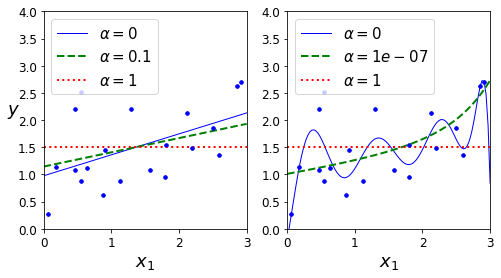

In [ ]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)

plt.show()

**Observation** <br>
An important characteristic of Lasso Regression is that *`it tends to eliminate the weights of the least important features`* (i.e., set them to zero).<br>
For example, the dashed line in the righthand plot  (with α = 10$^-$$^7$) looks quadratic, almost linear: all the weights for the high-degree polynomial features are equal to zero <br>
In other words, **Lasso Regression automatically performs feature selection and outputs a sparse model** (i.e., with few nonzero feature weights).



In [ ]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])


- **Key Difference**  <br>

Ridge: It includes all (or none) of the features in the model. Thus, the major advantage of ridge regression is coefficient shrinkage and reducing model complexity.<br>

Lasso: Along with shrinking coefficients, lasso performs feature selection as well.  As we observed earlier, some of the coefficients become exactly zero, which is equivalent to the particular feature being excluded from the model.

- **Typical Use Cases** <br>

Ridge: It is majorly used to prevent overfitting. Since it includes all the features, it is not very useful in case of exorbitantly high #features, say in millions, as it will pose computational challenges.<br>

Lasso: Since it provides sparse solutions, it is generally the model of choice (or some variant of this concept) for modelling cases where the #features are in millions or more. In such a case, getting a sparse solution is of great computational advantage as the features with zero coefficients can simply be ignored.

- **Presence of Highly Correlated Features** <br>

Ridge: It generally works well even in presence of highly correlated features as it will include all of them in the model but the coefficients will be distributed among them depending on the correlation.<br> 

Lasso: It arbitrarily selects any one feature among the highly correlated ones and reduced the coefficients of the rest to zero. Also, the chosen variable changes randomly with change in model parameters. This generally doesn’t work that well as compared to ridge regression.


### Elastic Net

- Elastic Net is a middle ground between Ridge Regression and Lasso Regression. 
- The regularization term is a simple mix of both Ridge and Lasso’s regularization terms, and you can control the mix ratio r.
- r = 0,Elastic Net is equivalent to Ridge Regression,
- r =1, Elastic Net is equivalent to Lasso Regression,

**So when should you use plain Linear Regression , Ridge, Lasso, or Elastic Net?**
- generally we should avoid plain Linear Regression.
- <font color ='blue'> Ridge is a good default, but if you suspect that only a few features are useful, you should prefer Lasso or Elastic Net because they tend to reduce the useless features’ weights down to zero </font>
- <font color ='green'> In general, Elastic Net is preferred over Lasso because Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated. </font>

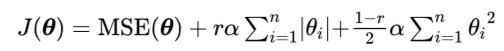

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1,l1_ratio =0.5, random_state=1)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([1.54333232])

#### Early Stopping

A different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. This is called **early stopping**


In [ ]:
np.random.seed(1)
m= 100
X= 6* np.random.rand(m,1)- 3
y= 2 + X+ 0.5* X**2 + np.random.randn(m,1)

X_train,X_val,y_train,y_val = train_test_split(X[:50],y[:50].ravel(), test_size=0.5, random_state=10)
poly_scaler = Pipeline([
                        ("poly_features",PolynomialFeatures(degree=10, include_bias=False)),
                        ("std_scaler",StandardScaler())
                      ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,tol=-np.infty,eta0=0.0005,warm_start=True,learning_rate='constant',random_state=1)


<font color='brown'> With warm_start=True , when the fit() method is called it continues training where it left off, instead of restarting from scratch.

In [ ]:
n_epochs=500
train_errors,val_errors=[],[]
for epoch in range(n_epochs):
  sgd_reg.fit(X_train_poly_scaled,y_train) ## continues where it left off
  y_train_predict = sgd_reg.predict(X_train_poly_scaled)
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  train_errors.append(mean_squared_error(y_train,y_train_predict))
  val_errors.append(mean_squared_error(y_val,y_val_predict))


In [ ]:
train_errors[:10] , val_errors[:10],np.argmin(val_errors)

([17.019984359624274,
  16.534861323929753,
  16.065514845105938,
  15.61136912637066,
  15.17187213724004,
  14.746494466920774,
  14.334728250297013,
  13.93608615957242,
  13.55010045557225,
  13.176322093502439],
 [17.42620010705508,
  16.67047993156444,
  15.94949088856882,
  15.261664100054174,
  14.605501154324857,
  13.97957098630792,
  13.382506895217928,
  12.813003692492876,
  12.269814973597452,
  11.751750507854922],
 92)

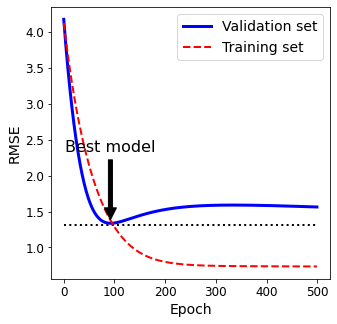

In [ ]:
best_epoch = np.argmin(val_errors)
best_val_rmse= np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

- Above shows a complex model (a high-degree =10 ,Polynomial Regression model) being trained with Batch Gradient Descent.
- As the epochs go by the algorithm learns, and its prediction error (RMSE) on the training set goes down, along with its prediction error on the validation set.
- After a while though, the validation error stops decreasing and starts to go back up. This indicates that the model has started to overfit the training data. 
- With early stopping , just stop training as soon as the validation error reaches the minimum.


With Stochastic and Mini-batch Gradient Descent, the curves are not so smooth, and it may be hard to know whether you have reached the minimum or not. One solution is to stop only after the validation error has been above the minimum for some time (when you are confident that the model will not do any better), then roll back the model parameters to the point where the validation error was at a minimum.